<a href="https://colab.research.google.com/github/gcarmonaar/EPIO2024-AlgoritmosBioInspirados/blob/main/EPIO_AlgoritmosBioInspirados_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de la mochila

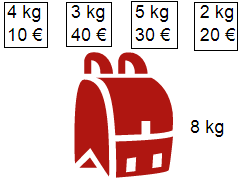

Supongamos que tenemos 10 objetos de diferentes valores monetarios y diferentes pesos. Queremos transportarlos en una mochila en la que no caben todos los objetos, pero queremos maximizar el valor total de lo que transportamos.

Para tratar un ejemplo práctico: tenemos una mochila que soporta **1000** gramos como máximo. Y además, tenemos objetos con los valores y pesos siguientes:








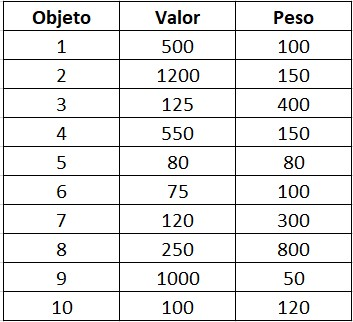


Imaginemos que decidimos llevarnos los objetos **2, 3, 5, 7 y 8**, que suman un peso total de 980 y un valor monetario en la mochila de **$2525**.

##Pero... ¿esta elección de objetos es la mejor?

## ¿Podríamos generar todas las posibles soluciones del problema manualmente para encontrar la mejor opción?

##¿Qué pasa si en lugar de 10 objetos son 100 objetos o más?

Para esto recurrimos a un algoritmo genético

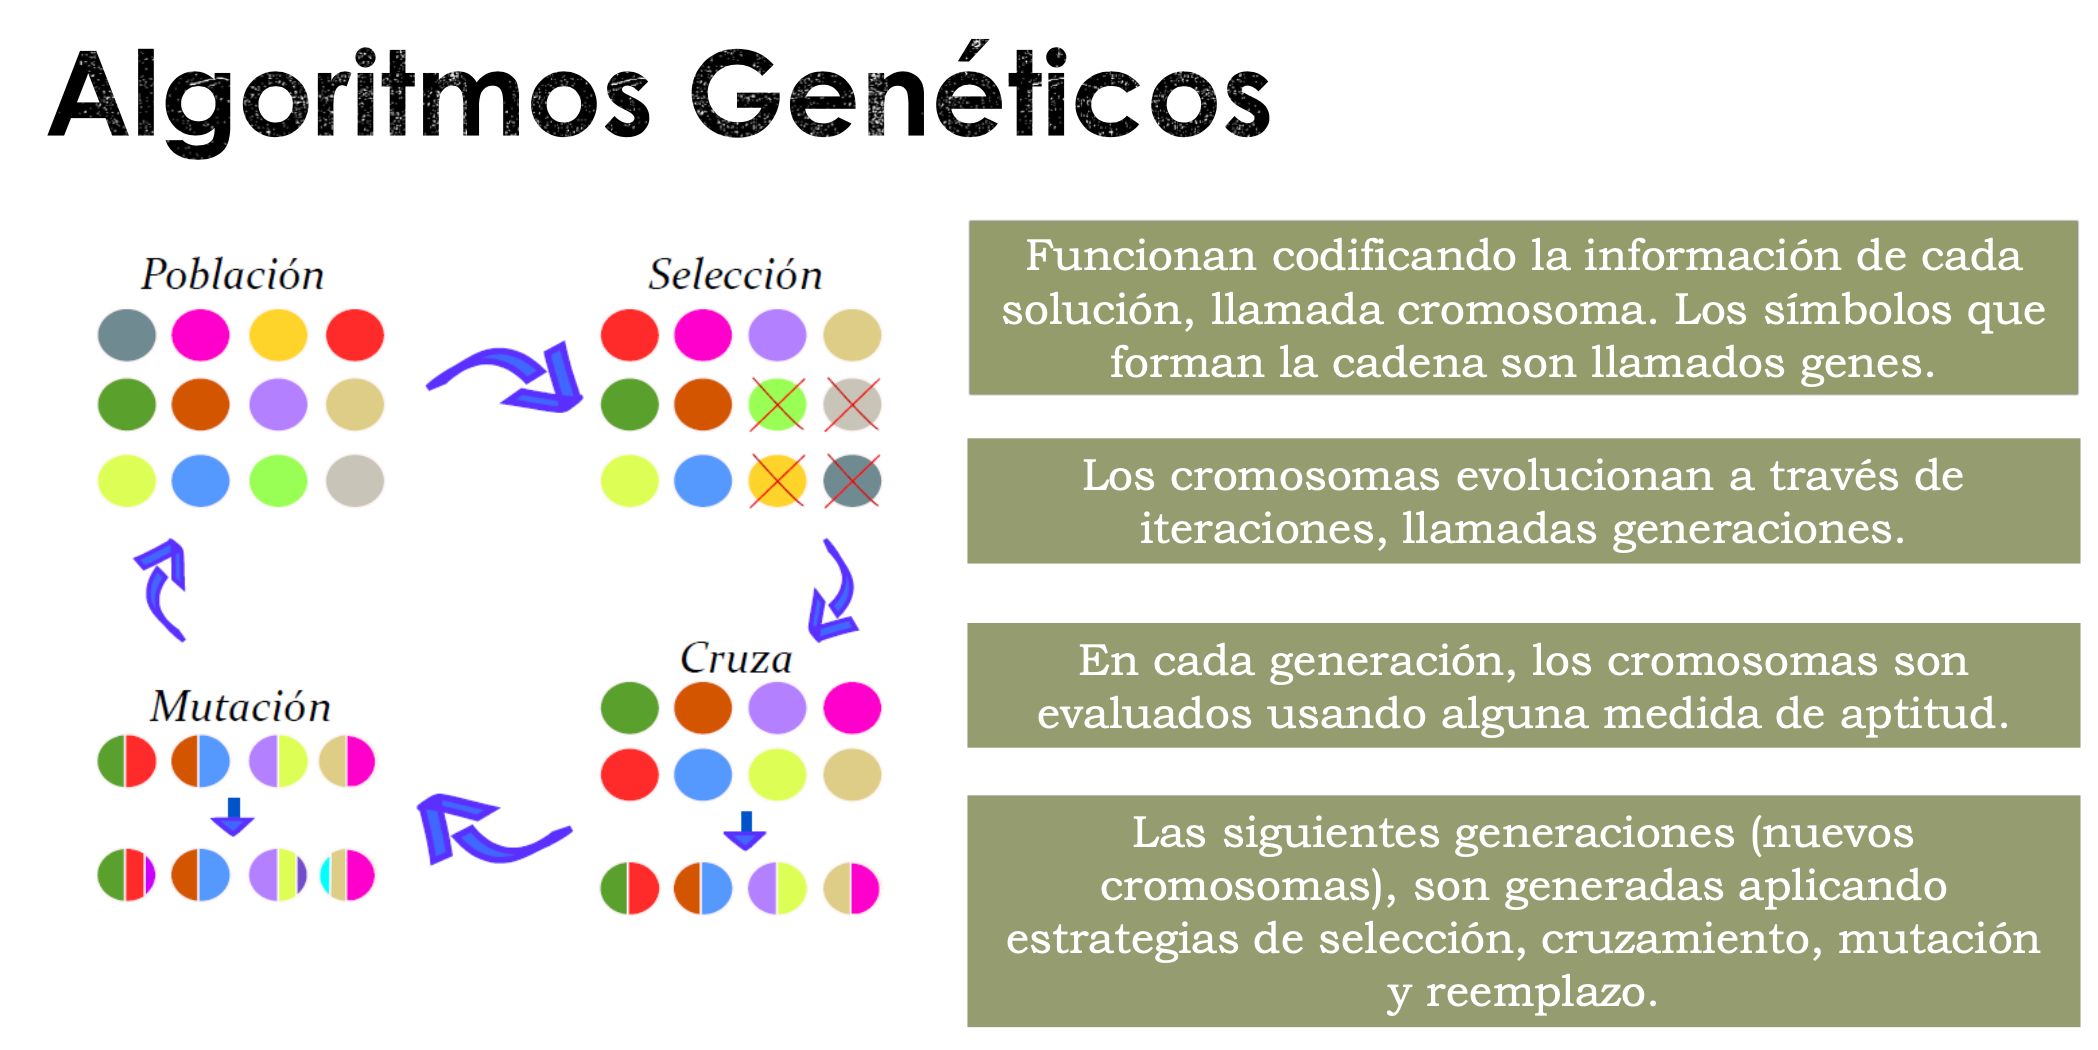

Una de las partes más importantes de un algoritmo genético es elegir la mejor manera en que vamos a representar a una solución factible del problema para que la computadora lo interprete.
En este caso, utilizaremos un vector de ceros y unos para representar una solución, a la que también llamaremos individuo o cromosoma, en donde un valor de 0 representa que el objeto no entra en la mochila, mientras que un 1 representa que el objeto si estará dentro de la mochila. Por ejemplo:

El vector [0,1,1,0,1,0,1,0,1,0] representa que en la mochila contiene a los objetos 2, 3, 5, 7, y 9 (que es el ejemplo de arriba).

# Veamos un ejemplo

In [1]:
import random as rn
rn.seed(1)

Instancias del problema: los objetos a elegir y sus caracterísitcas, valor y peso.

In [2]:
pesos=[100,150,400,150,80,100,300,800,50,120]
valores=[500,1200,125,550,80,75,120,250,1000,100]

Inicialización de las variables y los parámetros necesarios para el algoritmo:

In [3]:
tam_poblacion=10
poblacion=[]
etiquetas=[]
total_pesos=[]
total_valores=[]
ejecuciones=1
num_generaciones=10
p_cruza=0.8
p_muta=0.1

**n** es el número de objetos y **capacidad** es la capacidad de peso de la mochila.

In [4]:
n=10
capacidad=1000

El primer paso es generar una población aleatoria de **n** soluciones, verificando que no se exceda la capacidad de la mochila.

In [5]:
def generaPoblacion():
    elements=list(range(0,n))
    poblacion=[]
    eti=[]
    for i in range(0,tam_poblacion):
        ale=rn.randint(1,n)
        indiv=rn.sample(elements,ale)
        eti.append(indiv)
        ind=[0]*n
        for j in indiv:
            ind[j]=1
        poblacion.append(ind)
    return poblacion, eti

De esta manera generamos una población de tamaño N-

In [6]:
poblacion,etiquetas=generaPoblacion()

La población generada es un conjunto de listas con la representación elegida, donde cada elemento es un individuo de la población.

In [7]:
for i in range(len(poblacion)):
    print("Individuo", i+1, ": ", poblacion[i] )

Individuo 1 :  [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
Individuo 2 :  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Individuo 3 :  [1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
Individuo 4 :  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Individuo 5 :  [1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
Individuo 6 :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Individuo 7 :  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Individuo 8 :  [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Individuo 9 :  [0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Individuo 10 :  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


Las etiquetas son una herramienta que nos ayuda a visualizar el índice de los objetos resguardados en la mochila

In [8]:
for i in range(len(poblacion)):
    print("Individuo", i+1, " contiene a los objetos: ", etiquetas[i] )

Individuo 1  contiene a los objetos:  [9, 1, 4]
Individuo 2  contiene a los objetos:  [7, 9]
Individuo 3  contiene a los objetos:  [6, 3, 1, 8, 0, 9, 4, 2]
Individuo 4  contiene a los objetos:  [7]
Individuo 5  contiene a los objetos:  [3, 1, 5, 0, 6]
Individuo 6  contiene a los objetos:  [8]
Individuo 7  contiene a los objetos:  [6]
Individuo 8  contiene a los objetos:  [6, 0, 3, 9]
Individuo 9  contiene a los objetos:  [7, 8, 3, 2, 1, 5, 9, 4]
Individuo 10  contiene a los objetos:  [6]


Calcular la suma de pesos de cada solución en la población

In [9]:
def peso_individuo(ind):
    peso_ind=0
    for i in range(0,n):
        if ind[i]==1:
            peso_ind=peso_ind+pesos[i]
    return peso_ind


def pesos_poblacion():
    pesos_pob=[]
    for j in range(0,tam_poblacion):
        peso=peso_individuo(poblacion[j])
        pesos_pob.append(peso)
    return pesos_pob

Obtenemos los pesos de cada solución

In [10]:
total_pesos=pesos_poblacion()
for i in range(len(total_pesos)):
    print("Individuo", i+1, " contiene ", total_pesos[i], "en peso (gr)" )

Individuo 1  contiene  350 en peso (gr)
Individuo 2  contiene  920 en peso (gr)
Individuo 3  contiene  1350 en peso (gr)
Individuo 4  contiene  800 en peso (gr)
Individuo 5  contiene  800 en peso (gr)
Individuo 6  contiene  50 en peso (gr)
Individuo 7  contiene  300 en peso (gr)
Individuo 8  contiene  670 en peso (gr)
Individuo 9  contiene  1850 en peso (gr)
Individuo 10  contiene  300 en peso (gr)


Calcular los valores en la mochila de cada individuo

In [11]:
def valor_individuo(ind):
    val_ind=0
    for i in range(0,n):
        if ind[i]==1:
            val_ind=val_ind+valores[i]
    return val_ind


def valores_poblacion():
    valores_pob=[]
    for j in range(0,tam_poblacion):
        valor=valor_individuo(poblacion[j])
        valores_pob.append(valor)
    return valores_pob


Obtenemos los valores de cada solución

In [12]:
total_valores=valores_poblacion()
for i in range(len(total_valores)):
    print("Individuo", i+1, " contiene $", total_valores[i], "en valor" )

Individuo 1  contiene $ 1380 en valor
Individuo 2  contiene $ 350 en valor
Individuo 3  contiene $ 3675 en valor
Individuo 4  contiene $ 250 en valor
Individuo 5  contiene $ 2445 en valor
Individuo 6  contiene $ 1000 en valor
Individuo 7  contiene $ 120 en valor
Individuo 8  contiene $ 1270 en valor
Individuo 9  contiene $ 3380 en valor
Individuo 10  contiene $ 120 en valor


Recordemos que la mochila tiene una capacidad de peso, así que no debemos rebasarla, en las soluciones creadas anteriormente algunas rebasan la capacidad, es por esto que es necesario crear una estrategia de reparación de las soluciones: **reparaPoblacion()**

In [13]:
def reparaPoblacion():
    for individuo in range(0,tam_poblacion):
        while total_pesos[individuo]>capacidad:
            cambio=rn.sample(etiquetas[individuo],1)
            pos_cambio=cambio[0]
            indrep=poblacion[individuo]
            indrep[pos_cambio]=0
            total_pesos[individuo]=total_pesos[individuo]-pesos[pos_cambio]
            total_valores[individuo]=total_valores[individuo]-valores[pos_cambio]
            etiquetas[individuo].remove(pos_cambio)

    return poblacion,etiquetas,total_pesos,total_valores

Se aplica la reparación de las soluciones a la población generada para así tener únicamente soluciones **factibles**, esto es, que cumplan con las restricciones del problema.

In [14]:
poblacion,etiquetas,total_pesos,total_valores=reparaPoblacion()

In [15]:
for i in range(len(poblacion)):
    print("Individuo", i+1, ": ", poblacion[i] )

Individuo 1 :  [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
Individuo 2 :  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Individuo 3 :  [1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
Individuo 4 :  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Individuo 5 :  [1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
Individuo 6 :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Individuo 7 :  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Individuo 8 :  [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Individuo 9 :  [0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
Individuo 10 :  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [16]:
for i in range(len(poblacion)):
    print("Individuo", i+1, " contiene los objetos: ", etiquetas[i] )

Individuo 1  contiene los objetos:  [9, 1, 4]
Individuo 2  contiene los objetos:  [7, 9]
Individuo 3  contiene los objetos:  [6, 8, 0, 9, 4]
Individuo 4  contiene los objetos:  [7]
Individuo 5  contiene los objetos:  [3, 1, 5, 0, 6]
Individuo 6  contiene los objetos:  [8]
Individuo 7  contiene los objetos:  [6]
Individuo 8  contiene los objetos:  [6, 0, 3, 9]
Individuo 9  contiene los objetos:  [8, 3, 2, 5, 9, 4]
Individuo 10  contiene los objetos:  [6]


In [18]:
for i in range(len(total_pesos)):
    print("Individuo", i+1, " contiene ", total_pesos[i], "gr en peso" )

Individuo 1  contiene  350 gr en peso
Individuo 2  contiene  920 gr en peso
Individuo 3  contiene  650 gr en peso
Individuo 4  contiene  800 gr en peso
Individuo 5  contiene  800 gr en peso
Individuo 6  contiene  50 gr en peso
Individuo 7  contiene  300 gr en peso
Individuo 8  contiene  670 gr en peso
Individuo 9  contiene  900 gr en peso
Individuo 10  contiene  300 gr en peso


In [19]:
for i in range(len(total_valores)):
    print("Individuo", i+1, " contiene $", total_valores[i], "en valor" )

Individuo 1  contiene $ 1380 en valor
Individuo 2  contiene $ 350 en valor
Individuo 3  contiene $ 1800 en valor
Individuo 4  contiene $ 250 en valor
Individuo 5  contiene $ 2445 en valor
Individuo 6  contiene $ 1000 en valor
Individuo 7  contiene $ 120 en valor
Individuo 8  contiene $ 1270 en valor
Individuo 9  contiene $ 1930 en valor
Individuo 10  contiene $ 120 en valor


Una vez que se genera la población inicial, se requiere **elegir** entre los individuos de la población un subconjunto que fungiran como padres para el proceso de recombinación y mutación.  Existen varias maneras de elegir los individuos, en esta ocasión se utiliza una **selección por torneo**.

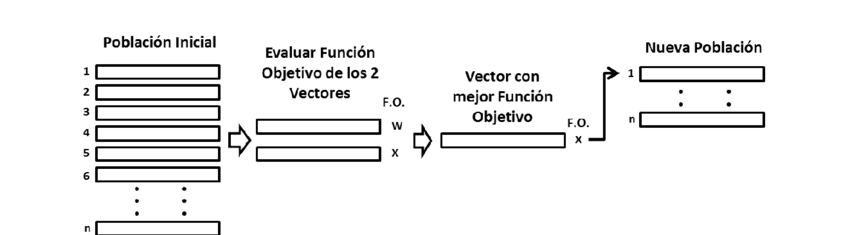

In [20]:
def seleccion_torneo(p):
    padres=[]
    for i in range (0,p):
        rn.shuffle(poblacion)
        poblacion1=poblacion
        for j in range (0,tam_poblacion,2):
            ind1=poblacion1[j]
            ind2=poblacion1[j+1]
            index1=poblacion.index(ind1)
            index2=poblacion.index(ind2)
            if total_pesos[index2]>=total_pesos[index1]:
                padres.append(ind1)
            else:
                padres.append(ind2)
    return padres

Esta selección de la población va a constituir nuestro conjunto de **padres**, que van a generar nuevas soluciones: **hijos**.

In [24]:
padres=seleccion_torneo(2)
print(padres)

[[1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 1, 1, 1, 1, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]]


Una vez que se seleccionaron los padres se procede a aplicar el mecanismo de cruza, proceso en el cual se van a combinar características de dos padres para generar nuevos inidividuos. En este caso estamos usando un operador de cruza llamado: CRUZA DE UN PUNTO.

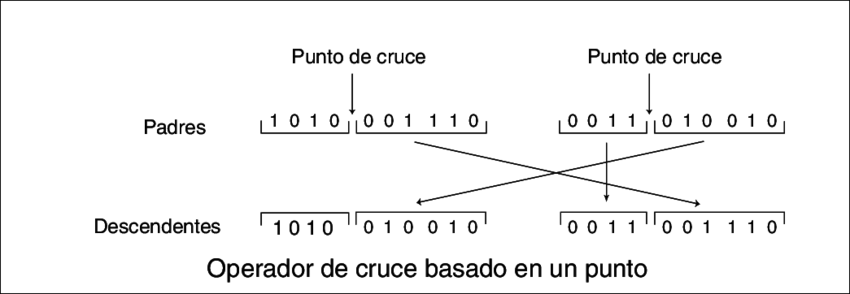

In [25]:
def crossover(ind1,ind2):
    if len(ind1)==1 or len(ind2)==1 or rn.random()>p_cruza:
        hijo1=ind1
        hijo2=ind2
    else:
        punto_corte=rn.randint(1,n-1)
        aux1=ind1[:punto_corte]
        aux2=ind1[punto_corte:]
        aux3=ind2[:punto_corte]
        aux4=ind2[punto_corte:]
        hijo1=aux1+aux4
        hijo2=aux3+aux2
    return hijo1,hijo2

Se muestra un ejemplo donde dado dos padres seleccionados del conjunto de todos los padres, estos se cruzan para generar individuos nuevos, dos hijos.

In [26]:
print("Padre 1:", padres[0])
print("Padre 2:", padres[1])

Padre 1: [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Padre 2: [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]


In [27]:
hijo1,hijo2=crossover(padres[0],padres[1])
print("Hijo 1:", hijo1)
print("Hijo 2:", hijo2)

Hijo 1: [1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Hijo 2: [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]


Posteriormente, para un porcentaje de los hijos generados se aplica una **perturbación en la solución**, a esto se le llama ***Mutación***, existen varios operadores de mutación, en este caso estamos usando un operador de mutación simple que solo cambia en una posición simple donde hace un cambio de cero por uno.

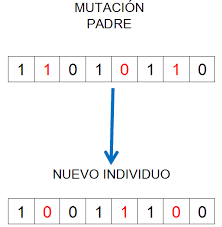

In [28]:
def mutacion(ind):
    for i in range(0,n):
        if rn.random()<p_muta:
            if ind[i]==0:
                ind[i]=1
            else:
                ind[i]=0
    return ind

In [30]:
print('Individuo sin mutar:')
print(hijo1)
mutado=mutacion(hijo1)
print('Individuo mutado:')
print(mutado)

Individuo sin mutar:
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Individuo mutado:
[1, 0, 1, 1, 1, 0, 0, 0, 0, 1]


In [31]:
def labeles():
    labels=[]
    for i in range(0, tam_poblacion):
        eti=[]
        ele=poblacion[i]
        for j in range(0,n):
            if(ele[j]==1):
                eti.append(j)
        labels.append(eti)
    return labels

# Ejemplos con otras instancias de problema

In [32]:
poblacion=[]
etiquetas=[]
total_pesos=[]
total_valores=[]
ejecuciones=1

In [33]:
tam_poblacion=10
num_generaciones=50
p_cruza=0.8
p_muta=0.1

En este ejemplo tenemos una mochila cuya capacidad es de 6489 y se tienen un total de 250 objetos de los cuales queremos seleccionar aquellos que nos proporcionen el maximo valor de la mochila.

In [34]:
n=50
capacidad=341045
pesos=[4912, 99732, 56554, 1818, 108372, 6750, 1484, 3072, 13532, 12050, 18440, 10972, 1940, 122094, 5558, 10630, 2112, 6942, 39888, 71276, 8466, 5662, 231302, 4690, 18324, 3384, 7278, 5566, 706, 10992, 27552, 7548, 934, 32038, 1062, 184848, 2604, 37644, 1832, 10306, 1126, 34886, 3526, 1196, 1338, 992, 1390, 56804, 56804, 634]
valores=[1906, 41516, 23527, 559, 45136, 2625, 492, 1086, 5516, 4875, 7570, 4436, 620, 50897, 2129, 4265, 706, 2721, 16494, 29688, 3383, 2181, 96601, 1795, 7512, 1242, 2889, 2133, 103, 4446, 11326, 3024, 217, 13269, 281, 77174, 952, 15572, 566, 4103, 313, 14393, 1313, 348, 419, 246, 445, 23552, 23552, 67]

El algoritmo genético queda condensado en la funcion **main**, donde se van a generar soluciones, se van a seleccionar individuos para padres para cruzar, para mutar y luego estos se van a introducir a la población reemplazando algunas soluciones existentes, usualemente reemplazando aquellas menos promisorias y este proceso se repite por un níumero definido de generaciones.

In [35]:
def main():
    global n,capacidad,valores,pesos,tam_poblacion,poblacion,etiquetas,total_pesos,total_valores

    print("Instancia con {} objetos y capacidad de mochila {} ".format(n,capacidad))
    poblacion,etiquetas=generaPoblacion()
    total_pesos=pesos_poblacion()
    total_valores=valores_poblacion()
    poblacion,etiquetas,total_pesos,total_valores=reparaPoblacion()
    mejor_eval=max(total_valores)
    mejor_pos=total_valores.index(mejor_eval)
    mejor_sol= poblacion[mejor_pos]
    mejor_weight=total_pesos[mejor_pos]
    for i in range(ejecuciones):
        gen=0
        while gen<num_generaciones:
            padres=seleccion_torneo(2)
            hijos=[]
            for cr in range(0,tam_poblacion,2):
                hij=crossover(padres[cr],padres[cr+1])
                hijos.append(hij[0])
                hijos.append(hij[1])

            mu=[]
            for m in range(0,tam_poblacion):
                mut=mutacion(hijos[m])
                mu.append(mut)


            poblacion=mu
            total_pesos=pesos_poblacion()
            total_valores=valores_poblacion()
            etiquetas=labeles()
            poblacion,etiquetas,total_pesos,total_valores=reparaPoblacion()

            if max(total_valores)>= mejor_eval:
                    mejor_pos= total_valores.index(max(total_valores))
                    mejor_sol= poblacion[mejor_pos]
                    mejor_eval= max(total_valores)
                    mejor_weight=total_pesos[mejor_pos]
            gen=gen+1
        print("\n")


        print("MEJOR SOLUCIÓN",mejor_sol)
        print( "VALOR EN LA MOCHILA: ", mejor_eval)
        print("PESO TOTAL EN LA MOCHILA ", mejor_weight)

if __name__ == "__main__":
    main()

Instancia con 50 objetos y capacidad de mochila 341045 


MEJOR SOLUCIÓN [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
VALOR EN LA MOCHILA:  141503
PESO TOTAL EN LA MOCHILA  340106


# **Ejercicio: probar la siguiente instancia de 250 objetos y capacidad de mochila 6489.**

In [ ]:
n=250
capacidad=6489
pesos=[79, 25, 99, 41, 94, 75, 40, 59, 95, 99, 95, 93, 74, 83, 14, 89, 41, 53, 75, 70, 49, 19, 84, 16, 25, 66, 68, 79, 16, 93, 14, 20, 99, 93, 100, 56, 62, 69, 91, 52, 86, 43, 76, 45, 21, 57, 45, 41, 58, 33, 68, 22, 66, 83, 50, 64, 35, 42, 33, 66, 38, 57, 69, 90, 79, 89, 28, 70, 38, 71, 46, 41, 49, 43, 36, 68, 92, 33, 84, 90, 22, 93, 92, 89, 47, 23, 13, 11, 34, 11, 60, 82, 10, 16, 81, 20, 85, 52, 92, 31, 24, 83, 76, 15, 38, 63, 32, 99, 39, 97, 28, 42, 80, 21, 99, 11, 91, 24, 45, 28, 89, 31, 81, 78, 48, 72, 36, 77, 84, 40, 65, 43, 49, 23, 82, 41, 22, 67, 96, 58, 56, 81, 42, 55, 31, 38, 33, 10, 43, 84, 52, 96, 92, 51, 50, 63, 70, 46, 30, 45, 41, 15, 82, 52, 25, 69, 62, 26, 64, 93, 78, 82, 71, 65, 40, 25, 20, 24, 19, 10, 12, 31, 22, 96, 79, 31, 98, 80, 10, 31, 42, 99, 26, 21, 83, 78, 66, 54, 100, 22, 48, 16, 25, 97, 95, 70, 22, 20, 16, 17, 19, 49, 90, 44, 53, 18, 42, 26, 87, 55, 58, 32, 61, 32, 10, 11, 12, 61, 96, 59, 94, 25, 30, 70, 53, 35, 54, 91, 51, 20, 87, 70, 50, 52, 31, 43, 32, 25, 40, 78]
valores=[100, 49, 54, 12, 78, 30, 65, 31, 90, 50, 80, 84, 53, 72, 94, 60, 74, 58, 17, 24, 45, 19, 33, 39, 91, 69, 48, 56, 84, 66, 60, 95, 49, 63, 22, 71, 83, 36, 15, 64, 28, 49, 41, 14, 17, 28, 65, 27, 65, 28, 21, 17, 33, 68, 51, 91, 97, 28, 91, 82, 54, 12, 47, 33, 30, 65, 56, 57, 91, 88, 77, 99, 29, 23, 39, 86, 12, 85, 22, 64, 33, 95, 32, 10, 44, 56, 86, 38, 72, 10, 57, 30, 28, 92, 68, 54, 34, 93, 35, 41, 46, 82, 66, 15, 89, 70, 46, 43, 60, 36, 63, 18, 67, 13, 12, 94, 19, 65, 59, 28, 91, 37, 24, 86, 23, 100, 38, 21, 42, 58, 91, 26, 69, 72, 89, 34, 84, 30, 24, 62, 20, 45, 11, 24, 54, 61, 14, 97, 79, 65, 68, 93, 54, 36, 41, 62, 90, 10, 58, 57, 46, 85, 19, 15, 15, 44, 70, 17, 25, 24, 37, 45, 97, 85, 64, 46, 74, 86, 89, 12, 83, 24, 40, 99, 27, 28, 65, 57, 66, 75, 50, 42, 34, 12, 59, 100, 12, 61, 98, 14, 68, 64, 46, 87, 68, 33, 43, 28, 24, 25, 29, 13, 59, 20, 66, 84, 16, 40, 69, 55, 73, 85, 25, 17, 81, 32, 74, 90, 88, 11, 98, 59, 12, 93, 16, 97, 37, 59, 57, 16, 73, 74, 65, 12, 33, 28, 66, 17, 88, 86]

¿Qué pasa si movemos algunos de los parámetros?


*   Tamaño de la población
*   Número de generaciones
*   Probabilidades de cruza o muta

